In [210]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.style.use('default')
plt.style.use('dark_background')

In [276]:
followers = pd.read_csv('the_rock_followers.csv')

followers

,input.user_id,input.session_id,input.max_id,users.pk,users.username,users.full_name,users.is_private,users.profile_pic_url,users.profile_pic_id,users.is_verified,users.has_anonymous_profile_picture,users.latest_reel_media,sections,big_list,next_max_id,page_size,status
0,232192182,XXX,NaN,21612652949,firmina55,Maria Firmina,False,https://scontent-lga3-1.cdninstagram.com/vp/5c...,2142914678333733735_21612652949,False,False,0,NaN,True,QVFBNmM1WXRtLTN4aTVCQk1XZUlwRmdyeE5kbFhqSld5MU...,200,ok
1,232192182,XXX,NaN,20330233576,ngocngoc_1234,#Son,False,https://scontent-lga3-1.cdninstagram.com/vp/19...,2134721415981792863_20330233576,False,False,0,NaN,True,QVFBNmM1WXRtLTN4aTVCQk1XZUlwRmdyeE5kbFhqSld5MU...,200,ok
2,232192182,XXX,NaN,18319385913,farzad.__.ab,farzad,True,https://scontent-lga3-1.cdninstagram.com/vp/6b...,2135476276323125238_18319385913,False,False,0,NaN,True,QVFBNmM1WXRtLTN4aTVCQk1XZUlwRmdyeE5kbFhqSld5MU...,200,ok
3,232192182,XXX,NaN,18168977119,salmanansari8752,Salman Ansari,False,https://instagram.fsub8-1.fna.fbcdn.net/vp/b38...,NaN,False,True,0,NaN,True,QVFBNmM1WXRtLTN4aTVCQk1XZUlwRmdyeE5kbFhqSld5MU...,200,ok
4,232192182,XXX,NaN,11549995284,polosan_terdabest,.𝕨𝕖𝕝𝕔𝕠𝕞𝕖.,False,https://scontent-lga3-1.cdninstagram.com/vp/9f...,2142745692284078376_11549995284,False,False,0,NaN,True,QVFBNmM1WXRtLTN4aTVCQk1XZUlwRmdyeE5kbFhqSld5MU...,200,ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5906314,232192182,XXX,QVFETmF6MFd0UmlDYzJrVWdQY0xBdHBnUjNhSzBvaEtQaz...,12104439009,vijileshvilly,Vijilesh,False,https://scontent-lga3-1.cdninstagram.com/vp/b1...,2136487489497925238_12104439009,False,False,0,NaN,True,QVFCanBzRHNyc3FPRFhRQURkcE55TDhyc3VKMS1EREJxck...,200,ok
5906315,232192182,XXX,QVFETmF6MFd0UmlDYzJrVWdQY0xBdHBnUjNhSzBvaEtQaz...,2090342716,tab_sii_,Tabea,True,https://scontent-lga3-1.cdninstagram.com/vp/5d...,NaN,False,False,0,NaN,True,QVFCanBzRHNyc3FPRFhRQURkcE55TDhyc3VKMS1EREJxck...,200,ok
5906316,232192182,XXX,QVFETmF6MFd0UmlDYzJrVWdQY0xBdHBnUjNhSzBvaEtQaz...,18294252643,adgjdan,NaN,False,https://instagram.fccp3-1.fna.fbcdn.net/vp/5c6...,NaN,False,True,0,NaN,True,QVFCanBzRHNyc3FPRFhRQURkcE55TDhyc3VKMS1EREJxck...,200,ok
5906317,232192182,XXX,QVFETmF6MFd0UmlDYzJrVWdQY0xBdHBnUjNhSzBvaEtQaz...,18076920135,saifalisk1992gmail.com2,saifalisk1992@gmail.com,False,https://scontent-lga3-1.cdninstagram.com/vp/99...,2111978115168324193_18076920135,False,False,0,NaN,True,QVFCanBzRHNyc3FPRFhRQURkcE55TDhyc3VKMS1EREJxck...,200,ok


In [211]:
followers['has_story'] = followers['users.latest_reel_media'] > 0

story_users = followers.loc[followers['has_story']].copy()

story_users['story_datetime'] = pd.to_datetime(
    story_users['users.latest_reel_media'],
    unit='s',
)

story_users['story_datetime_minute'] = story_users['story_datetime'].dt.floor('min')
story_users['story_datetime_hour'] = story_users['story_datetime'].dt.floor('H')
story_users['story_hour'] = story_users['story_datetime'].dt.hour

story_users['story_datetime_minute']

9         2019-09-28 12:38:00
13        2019-09-28 11:34:00
14        2019-09-28 06:35:00
17        2019-09-27 22:12:00
18        2019-09-27 17:51:00
                  ...        
5906273   2019-10-01 03:47:00
5906287   2019-10-01 11:48:00
5906290   2019-10-01 14:47:00
5906294   2019-10-01 20:55:00
5906311   2019-10-01 12:08:00
Name: story_datetime_minute, Length: 515714, dtype: datetime64[ns]

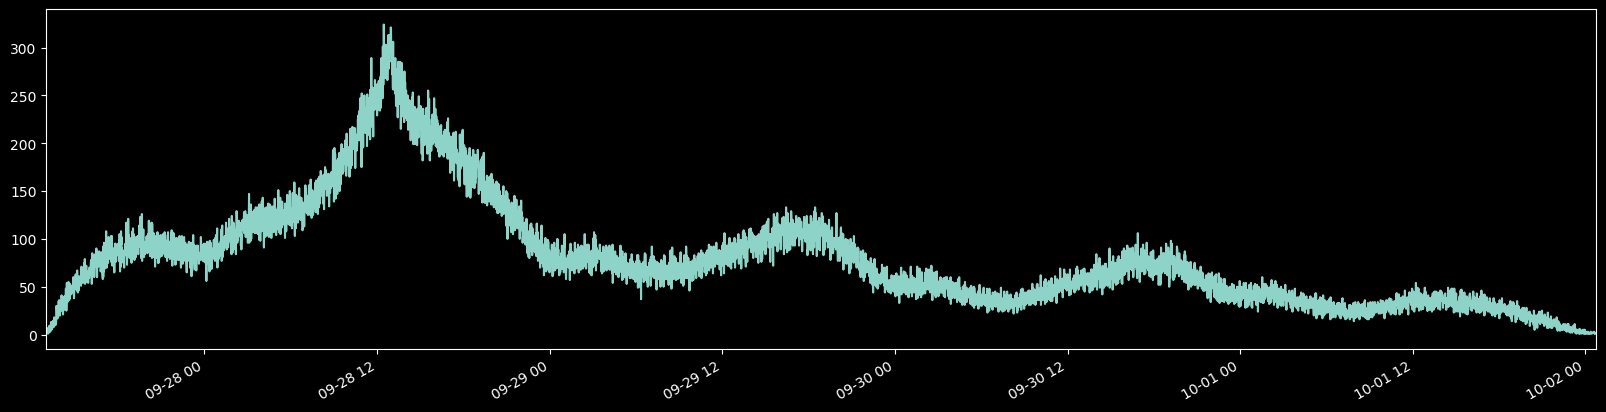

In [212]:
story_users['story_datetime_minute'] \
    .value_counts() \
    .sort_index(ascending=True) \
    .plot(kind='line', figsize=(20,5))

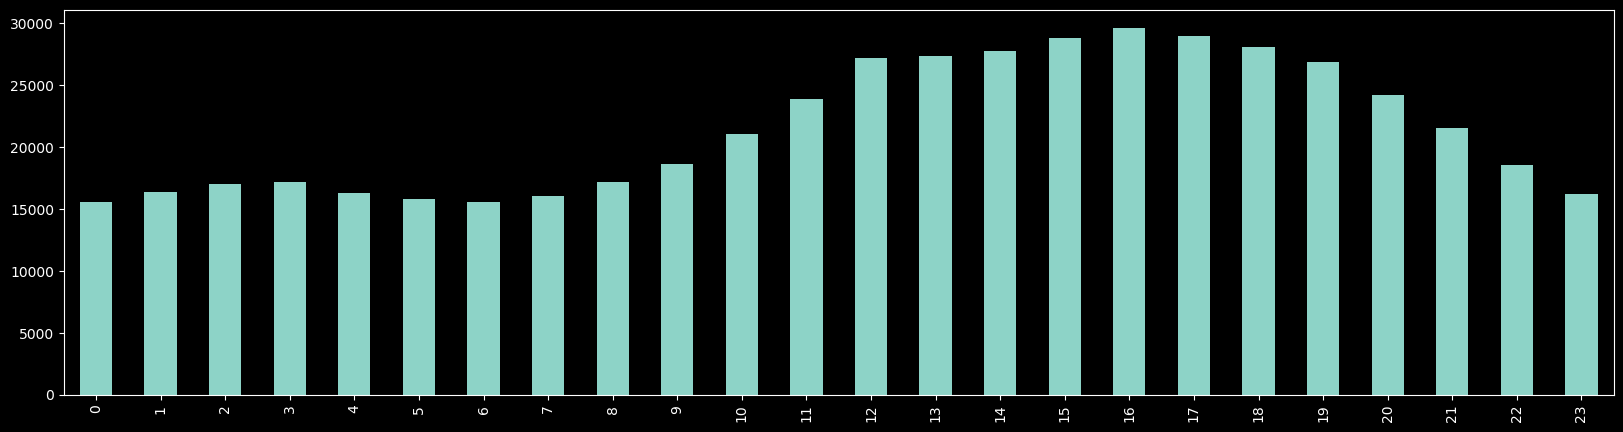

In [213]:
story_users['story_hour'] \
    .value_counts() \
    .sort_index(ascending=True) \
    .plot(kind='bar', figsize=(20,5))

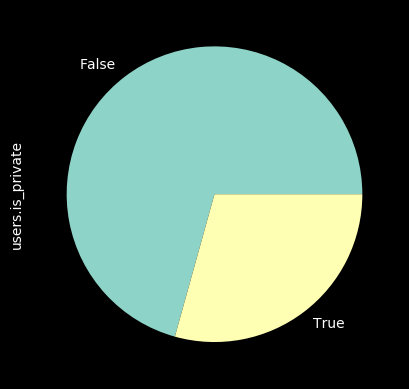

In [256]:
followers['users.is_private'] \
    .value_counts() \
    .sort_index(ascending=True) \
    .plot(kind='pie')

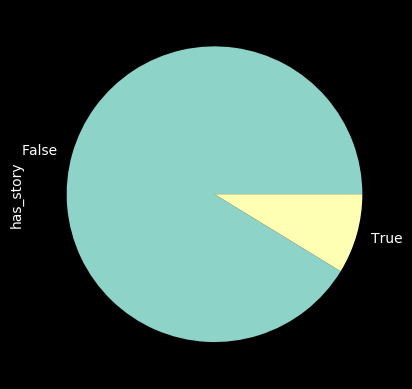

In [257]:
followers['has_story']  \
    .value_counts() \
    .sort_index(ascending=True) \
    .plot(kind='pie')

In [271]:
email_regex = """(?:[a-z0-9!#$%&'*+/=?^_`{|}~-]+(?:\.[a-z0-9!#$%&'*+/=?^_`{|}~-]+)*|"(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21\x23-\x5b\x5d-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])*")@(?:(?:[a-z0-9](?:[a-z0-9-]*[a-z0-9])?\.)+[a-z0-9](?:[a-z0-9-]*[a-z0-9])?|\[(?:(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?|[a-z0-9-]*[a-z0-9]:(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21-\x5a\x53-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])+)\])"""

email_users = followers.loc[followers['users.full_name'].str.count(email_regex) > 0].copy()
email_users.shape[0]

11120

In [272]:
email_users

,input.user_id,input.session_id,input.max_id,users.pk,users.username,users.full_name,users.is_private,users.profile_pic_url,users.profile_pic_id,users.is_verified,users.has_anonymous_profile_picture,users.latest_reel_media,sections,big_list,next_max_id,page_size,status,has_story,username_number_count,username_at_sign_count
267,232192182,XXX,QVFBNmM1WXRtLTN4aTVCQk1XZUlwRmdyeE5kbFhqSld5MU...,7604348802,mirelaioanahotmail.es,mirelaioana@hotmail.es,False,https://scontent-lga3-1.cdninstagram.com/vp/b8...,2099648419248804165_7604348802,False,False,0,NaN,True,QVFEUmRleTA5OWx3SEluVWVrcllDOUlCcXpEM3lOZlJmVW...,200,ok,False,0,0
1056,232192182,XXX,QVFDUmx4M2JyNEhvTVBSQnpQMU9ZLWZ0R05nZHRxS04yMV...,6238738307,gujjar_akki_9099,akkilohiya1329@gmail.com,False,https://scontent-lga3-1.cdninstagram.com/vp/bc...,2141432886776413423_6238738307,False,False,1569657783,NaN,True,QVFCSW80eDZqZ3dPS1NUUjdBanZxNmthQlEzQWRGYS1LYX...,200,ok,True,4,0
1319,232192182,XXX,QVFCSW80eDZqZ3dPS1NUUjdBanZxNmthQlEzQWRGYS1LYX...,21451072925,madihascreamgoilma,madihascream@goilma.com,False,https://instagram.fjoi2-1.fna.fbcdn.net/vp/551...,NaN,False,True,0,NaN,True,QVFEaV9VQlJvdkZJaHVZZE5Lby1MT0V2Z1hYd3puZ2V0UV...,200,ok,False,0,0
2732,232192182,XXX,QVFEM0lmSlZzZXRCNUUzeXp2bFZ2bjFaOVpCd0RVRlAyR1...,21413132126,delviazzayahoo.com7,delviazza@yahoo.com,False,https://scontent-lhr3-1.cdninstagram.com/vp/82...,NaN,False,True,0,NaN,True,QVFCNUU5R1R3RHlIQWpNTTB2b2dMdUJydmNQVDk5Y0hHbU...,200,ok,False,1,0
3137,232192182,XXX,QVFBV2dnUVlnQ3RXQzBSMnNKY01Vd0s0NmdRUjdCb0hTMH...,20085535908,amitrjaiswal27gmail.com5,amitrjaiswal27@gmail.com,False,https://scontent-lga3-1.cdninstagram.com/vp/bb...,2142913406225682790_20085535908,False,False,0,NaN,True,QVFDdFZfTHVFb2N0U09WalVkdldUZWRTcng5YXlTbERyZm...,200,ok,False,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5903680,232192182,XXX,QVFDLW1sLUtPRVF1UU11WW5fSFg0ZGw4NzJibFV1d1QtcU...,8490415998,amaraneniprashanth6gmail.com2,amaraneniprashanth6@gmail.com,False,https://scontent-lga3-1.cdninstagram.com/vp/e4...,1856755111680634607_8490415998,False,False,0,NaN,True,QVFDeS1QWGlCcnB0S1c1U1F5MG5iNFIxQkc2SXN2NG9oT0...,200,ok,False,2,0
5904781,232192182,XXX,QVFDRFhPUmFzYlc2SXZLV2hqNW1HN0RRQ0ZWZjNlZGdWU2...,18510907602,dubeylucky733gmail,dubeylucky733@gmail.com,False,https://scontent-lga3-1.cdninstagram.com/vp/e1...,2114499085481307895_18510907602,False,False,0,NaN,True,QVFDM19OY0Ezc0NCdTNsYjFJQjRmbkJOc2tsNVlKRnl6az...,200,ok,False,3,0
5904837,232192182,XXX,QVFDRFhPUmFzYlc2SXZLV2hqNW1HN0RRQ0ZWZjNlZGdWU2...,18418769275,mirzaee285gmail.co,mirzaee285@gmail.com,False,https://scontent-iad3-1.cdninstagram.com/vp/8a...,NaN,False,True,0,NaN,True,QVFDM19OY0Ezc0NCdTNsYjFJQjRmbkJOc2tsNVlKRnl6az...,200,ok,False,3,0
5905978,232192182,XXX,QVFBV3M4c1l5b1JpcWo5dldIY05YUEJjU0prZWw0QlhRVl...,3135752724,chekilibilel,Bilel Chekili@gmail.com,True,https://scontent-lga3-1.cdninstagram.com/vp/a1...,1613194323201184433_3135752724,False,False,0,NaN,True,QVFETmF6MFd0UmlDYzJrVWdQY0xBdHBnUjNhSzBvaEtQaz...,200,ok,False,0,0


In [273]:
followers['username_number_count'] = followers['users.username'].str.count('\d')
followers['username_number_count'] = np.where(
    followers['username_number_count'] > 5,
    5,
    followers['username_number_count']
)

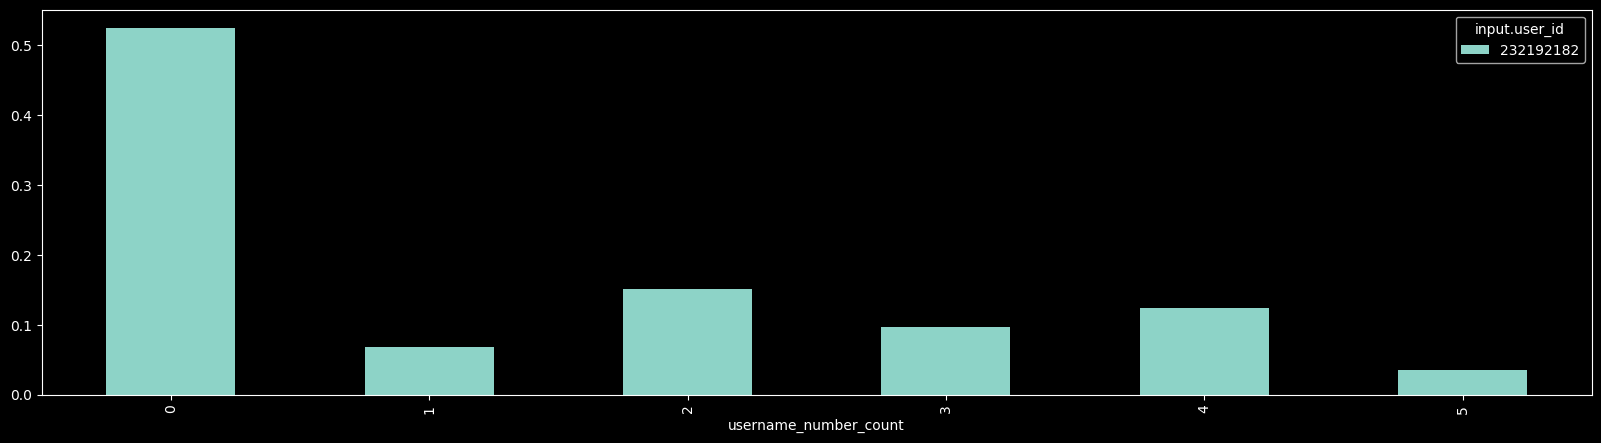

In [252]:
followers \
    .groupby('input.user_id')['username_number_count'] \
    .value_counts() \
    .apply(lambda x: x / float(followers.shape[0])) \
    .unstack() \
    .transpose() \
    .sort_index(ascending=True) \
    .plot(kind='bar', figsize=(20,5))

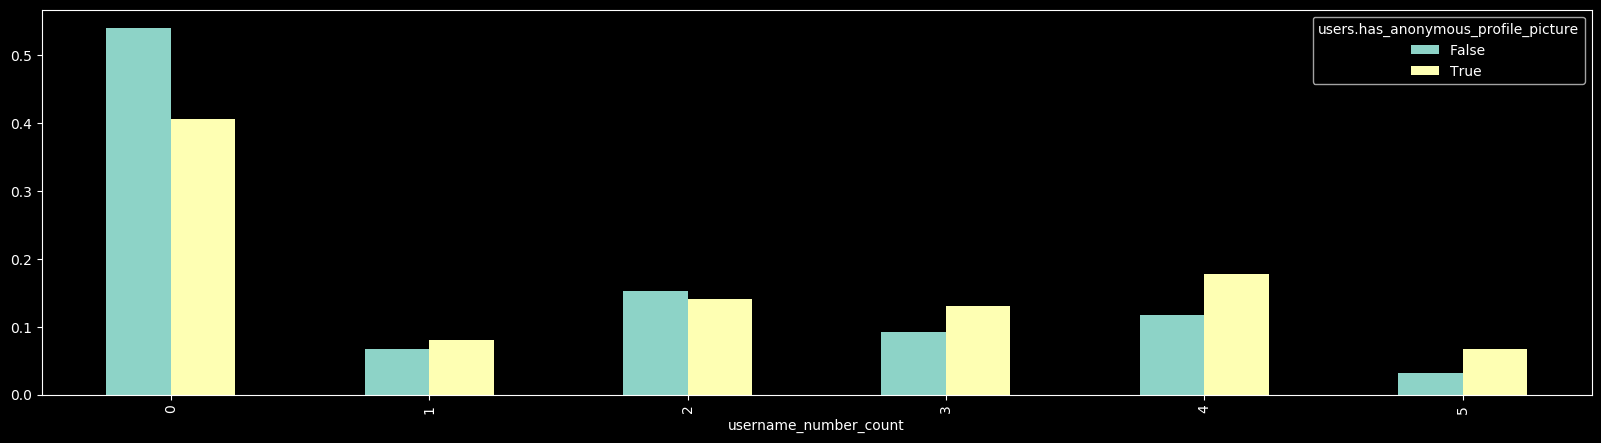

In [253]:
followers \
    .groupby('users.has_anonymous_profile_picture')['username_number_count'] \
    .value_counts() \
    .groupby(level=0).apply(lambda x: x / float(x.sum())) \
    .unstack() \
    .transpose() \
    .sort_index(ascending=True) \
    .plot(kind='bar', figsize=(20,5))

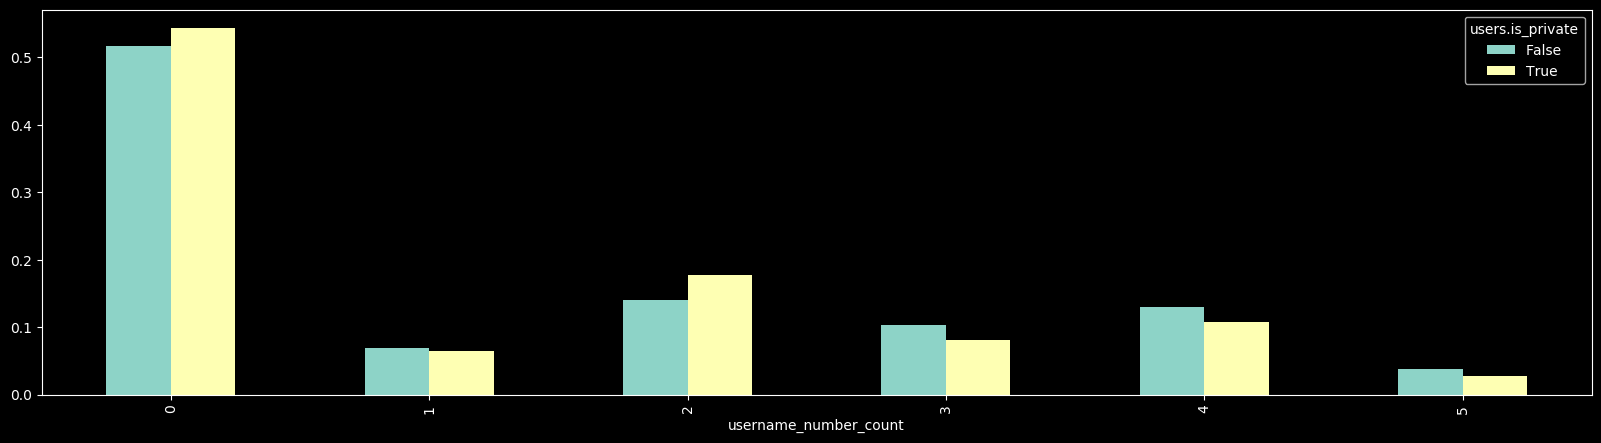

In [274]:
followers \
    .groupby('users.is_private')['username_number_count'] \
    .value_counts() \
    .groupby(level=0).apply(lambda x: x / float(x.sum())) \
    .unstack() \
    .transpose() \
    .sort_index(ascending=True) \
    .plot(kind='bar', figsize=(20,5))

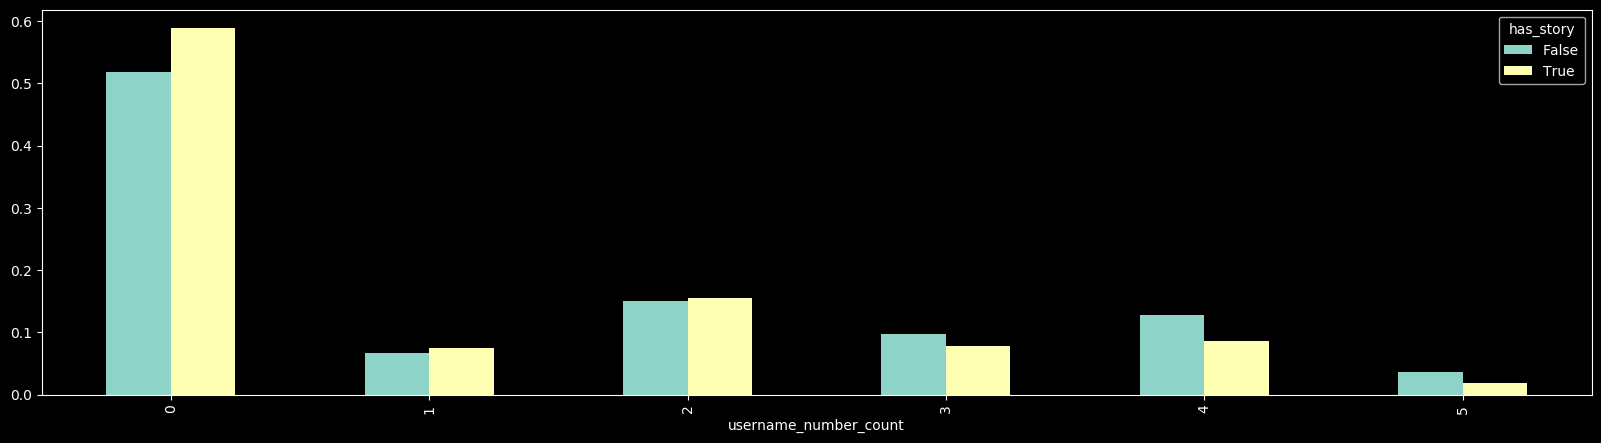

In [255]:
followers \
    .groupby('has_story')['username_number_count'] \
    .value_counts() \
    .groupby(level=0).apply(lambda x: x / float(x.sum())) \
    .unstack() \
    .transpose() \
    .sort_index(ascending=True) \
    .plot(kind='bar', figsize=(20,5))